In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_autos.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4


In [5]:
df.shape

(313687, 27)

In [4]:
df.vehicleType.unique()

array(['Other', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'kombi', 'bus', 'andere'], dtype=object)

## Variation of the price range by the vehicle type

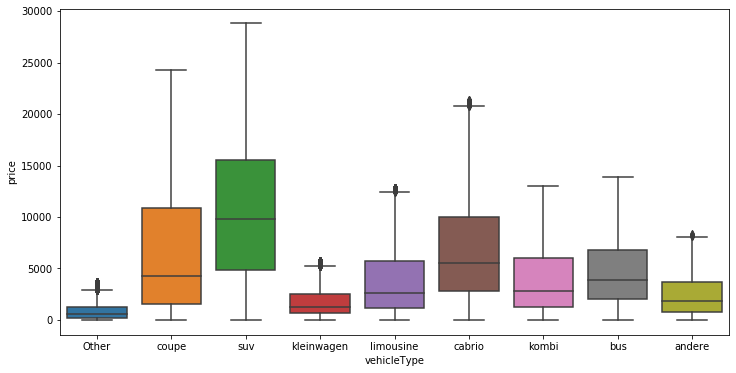

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x="vehicleType", y="price", data=df)
plt.show()

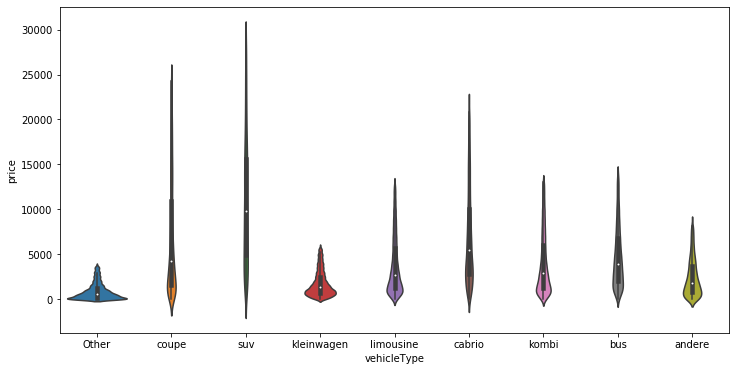

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x="vehicleType", y="price", data=df)
plt.show()

## Demonstration of the mean pricec by the vehicle type

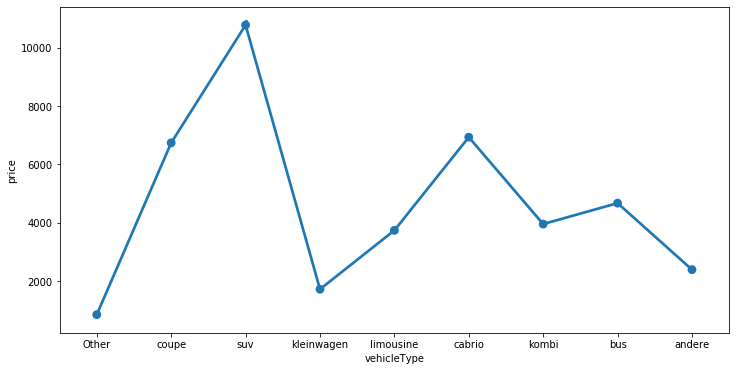

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x="vehicleType", y="price", data=df)
#ax.set_xticklabels(df.vehicleType.unique(), rotation=90);

In [15]:
order=df.groupby("vehicleType").price.mean().sort_values(ascending=False).index

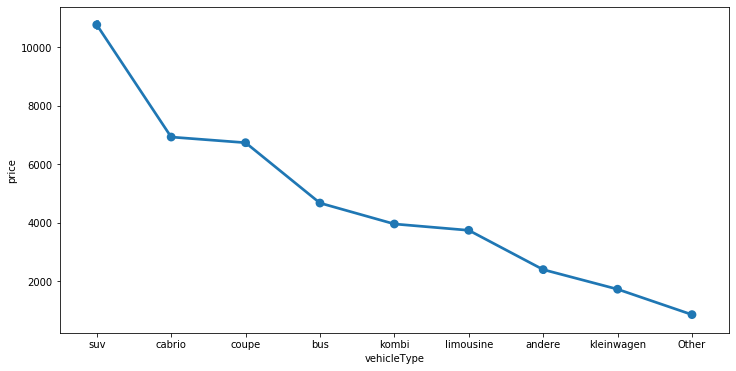

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x="vehicleType", y="price", order=order, data=df)

## Total count of vehicles by type available on ebay for sale

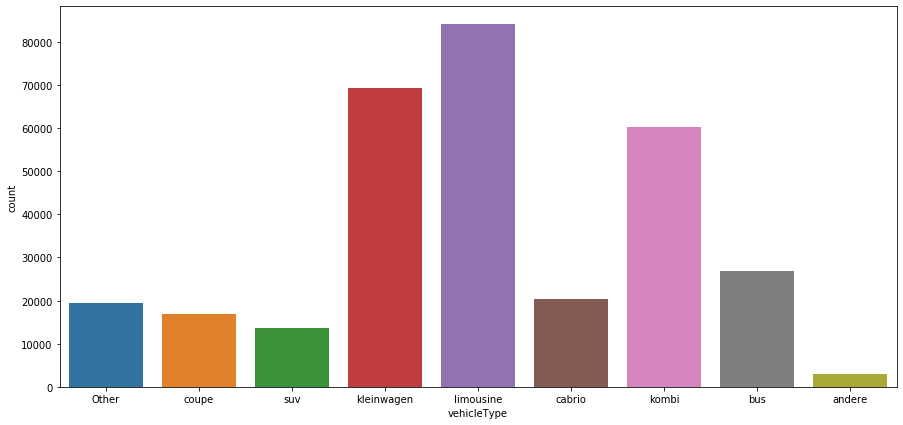

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(df.vehicleType)

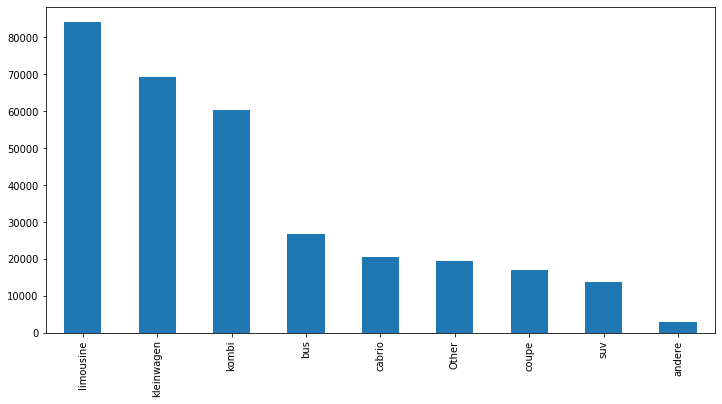

In [18]:
#pandas
df.vehicleType.value_counts().plot.bar(figsize=(12,6))

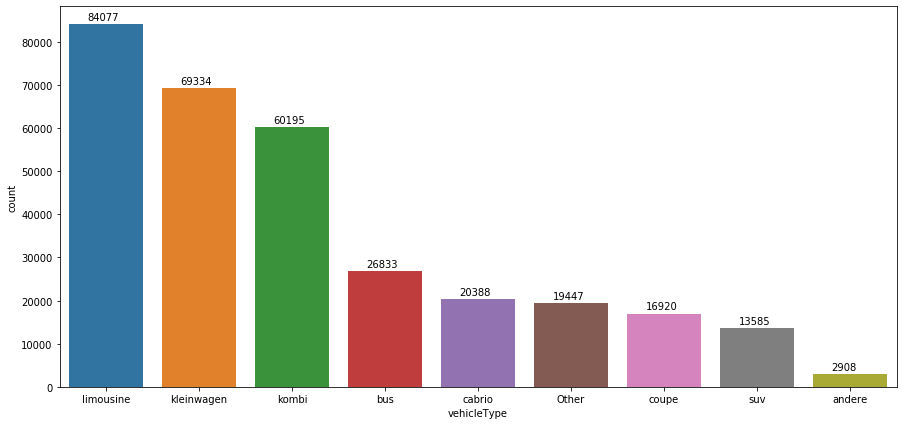

In [30]:
fig, ax = plt.subplots(figsize=(15, 7))
g=sns.countplot(df.vehicleType, order=df.vehicleType.value_counts().index)

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+1000))

In [22]:
x=df.vehicleType.value_counts()

In [23]:
x.index

Index(['limousine', 'kleinwagen', 'kombi', 'bus', 'cabrio', 'Other', 'coupe',
       'suv', 'andere'],
      dtype='object')

In [24]:
x.values

array([84077, 69334, 60195, 26833, 20388, 19447, 16920, 13585,  2908],
      dtype=int64)

<BarContainer object of 9 artists>

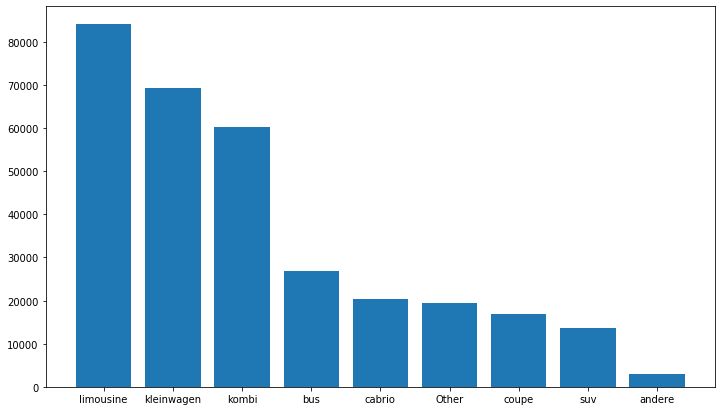

In [25]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(x.index, x.values)